### Case Study 3 : Textual analysis of movie reviews

** Due Date: April 6, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [27]:
"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD
# We have modified the code base, adjusted the imports, to make the skeleton work as needed.
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [3]:
# the training data folder must be passed as first argument
movie_reviews_data_folder = r"data/txt_sentoken/"
dataset = load_files(movie_reviews_data_folder, shuffle=True)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [23]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.33, random_state=42)

In [30]:
# TASK: Build a vectorizer / classifier pipeline that filters out tokens that are too rare or too frequent
# parameters are tweaked for performance reasons
# Just Build Different Pipelines
# LinearSVC(C=1000)
# KNeighborsClassifier(n_neighbors = 9)
# svm.SVC(kernel='rbf') 
# svm.SVC(kernel='linear')

pipeline = Pipeline([
       ('vect', TfidfVectorizer(min_df=0.05, max_df=0.95, stop_words=set(stopwords.words('english')))),
       ('clf', svm.SVC(kernel='linear') )])   

In [31]:
# TASK: Build a grid search to find out whether unigrams or bigrams are more useful.
# Fit the pipeline on the training set using grid search for the parameters
# Only using unigrams for performance reasons - 'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]
parameters = {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
grid_search.fit(docs_train, y_train)

# TASK: print the cross-validated scores for the each parameters set explored by the grid search
print(grid_search.grid_scores_)

[mean: 0.80672, std: 0.01680, params: {'vect__ngram_range': (1, 1)}, mean: 0.81194, std: 0.01263, params: {'vect__ngram_range': (1, 2)}, mean: 0.81194, std: 0.01263, params: {'vect__ngram_range': (1, 3)}]


In [22]:

# TASK: Predict the outcome on the testing set and store it in a variable named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

#     # import matplotlib.pyplot as plt
#     # plt.matshow(cm)
#     # plt.show()

             precision    recall  f1-score   support

        neg       0.77      0.79      0.78       240
        pos       0.80      0.78      0.79       260

avg / total       0.79      0.79      0.79       500

[[190  50]
 [ 57 203]]


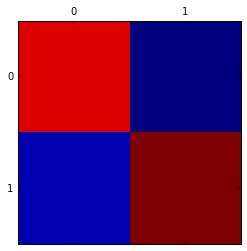

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(cm)
plt.show()

In [25]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(dataset.target_names))
    plt.xticks(tick_marks, dataset.target_names, rotation=45)
    plt.yticks(tick_marks, dataset.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

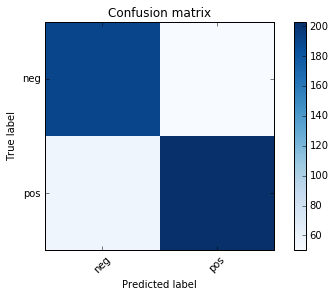

In [26]:
%matplotlib inline
plot_confusion_matrix(cm)

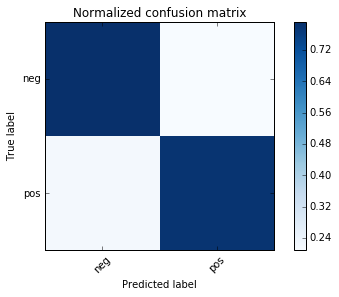

In [27]:
# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

**Term Frequency (tf)** is defined as the number of occurences of each word in a document divided by the total number of words in the document.  Because larger documents having higher average word count than smaller documents, tf normalizes the word count.  Further, words that are present in large number of documents are less informative.  **Inverse Document Frequency (idf)** is a refinement where we downscale weights of words to neutralize the ubiquity factor.
Holistically, this process of vectorizing words in a collection of documents is called Term Frequency times Inverse Document Frequency or td-idf.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
print("Extracting features from the dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(docs_train)

X_train = vectorizer.fit_transform((open(f).read() 
                                    for f in dataset.filenames))
                                   
print("n_samples: %d, n_features: %d" % X_train.shape)

Extracting features from the dataset using a sparse vectorizer
n_samples: 2000, n_features: 39659


**max_df: float in range [0.0, 1.0] or int, default 1.0**
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).  If float, the parameter represents a proportion of documents, integer absolute counts.  This parameter is ignored if vocabulary is not None.

**min_df: float in range [0.0, 1.0] or int, default 1.0**
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.  Also referred to as cut-off in the literature.  If float, the parameter represents a proportion of documents, integer absolute counts.  This parameter is ignored if vocabulary is not None.


In [21]:
import numpy as np
min_df = np.linspace(0.05, 0.95, 19)
max_df = np.linspace(0.05, 0.95, 19)
tdif_data = []
for i in min_df:
    for j in max_df:
        if i < j: 
            vectorizer = TfidfVectorizer(docs_train, min_df = i, max_df = j)
            X_train = vectorizer.fit_transform((open(f).read() 
                                    for f in dataset.filenames))
            tdif_data.append((i, j, X_train.shape[1]))
                             
# tdif_data has an array of tuples (min_df, max_df, n_features)
tdif_data

[(0.050000000000000003, 0.10000000000000001, 579),
 (0.050000000000000003, 0.14999999999999999, 763),
 (0.050000000000000003, 0.20000000000000001, 856),
 (0.050000000000000003, 0.25, 911),
 (0.050000000000000003, 0.29999999999999999, 953),
 (0.050000000000000003, 0.34999999999999998, 988),
 (0.050000000000000003, 0.39999999999999997, 1010),
 (0.050000000000000003, 0.44999999999999996, 1026),
 (0.050000000000000003, 0.49999999999999994, 1041),
 (0.050000000000000003, 0.54999999999999993, 1055),
 (0.050000000000000003, 0.59999999999999998, 1064),
 (0.050000000000000003, 0.65000000000000002, 1069),
 (0.050000000000000003, 0.69999999999999996, 1078),
 (0.050000000000000003, 0.75, 1088),
 (0.050000000000000003, 0.79999999999999993, 1090),
 (0.050000000000000003, 0.84999999999999998, 1095),
 (0.050000000000000003, 0.90000000000000002, 1105),
 (0.050000000000000003, 0.94999999999999996, 1107),
 (0.10000000000000001, 0.14999999999999999, 185),
 (0.10000000000000001, 0.20000000000000001, 278),


In [9]:
# ---------------------------------------------------------------------------------------------
# ngram_range: Is used to extract unigrams (1 word), bigrams (2 words)
# 
# ngram_range=(1,1) --> n_samples: 2000, n_features: 39659
# ngram_range=(1,2) --> n_samples: 2000, n_features: 538909
# ngram_range=(1,3) --> n_samples: 2000, n_features: 1529707
# ngram_range=(1,4) --> n_samples: 2000, n_features: 2712379
# ----------------------------------------------------------
vectorizer = TfidfVectorizer(docs_train, ngram_range=(1,4))
X_train = vectorizer.fit_transform((open(f).read() 
                                    for f in dataset.filenames))
print("n_samples: %d, n_features: %d" % X_train.shape)

n_samples: 2000, n_features: 2712379


*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [1]:
import sys
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# the training data folder must be passed as first argument
movie_reviews_data_folder = r"data/txt_sentoken/"
dataset = load_files(movie_reviews_data_folder, shuffle=False)
#print("n_samples: %d" % len(dataset.data))

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=None)

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])   

X = pipeline.fit_transform(dataset.data).todense()

pca = PCA(n_components=2).fit(X)

data2D = pca.transform(X)

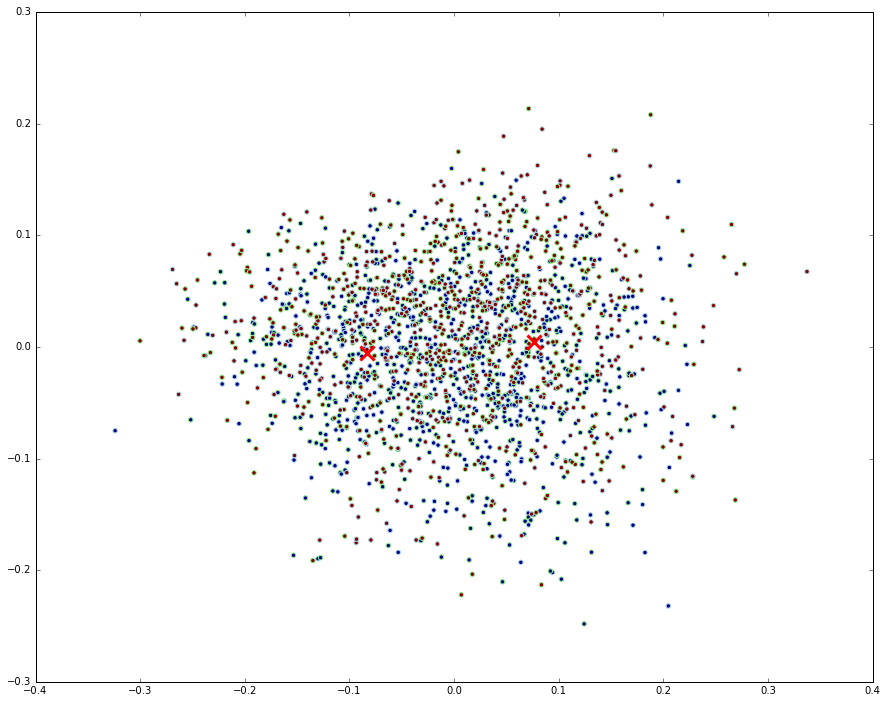

In [24]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 12.0)
plt.hold(True)

plt.scatter(data2D[:,0], data2D[:,1], c=dataset.target, color=['lightblue', 'lightgreen'])

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

# plt.hold(True)
# %matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (15.0, 12.0)
plt.scatter(centers2D[:,0], centers2D[:,1], marker='x', s=200, linewidths=3, c='red')

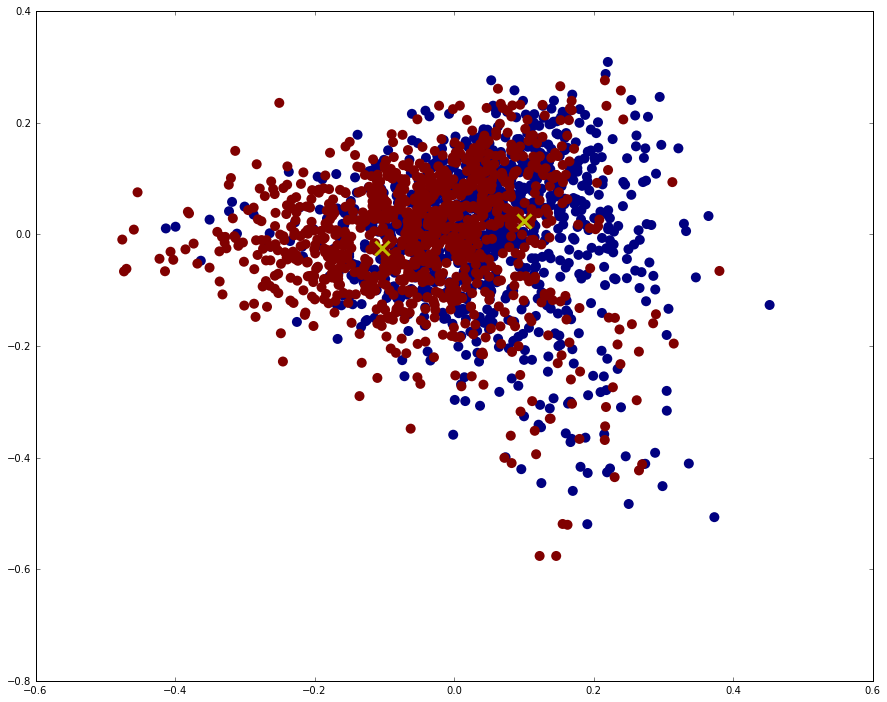

In [43]:
pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=0.2, 
                             max_df=0.5, 
                             stop_words=set(stopwords.words('english')),
                             max_features=1000)),
    ('tfidf', TfidfTransformer()),
])   

X = pipeline.fit_transform(dataset.data).todense()

pca = PCA(n_components=2).fit(X)

data2D = pca.transform(X)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 12.0)
plt.hold(True)

plt.scatter(data2D[:,0], data2D[:,1], c=dataset.target, s=100, linewidth='0')

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

# plt.hold(True)
# %matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (15.0, 12.0)
plt.scatter(centers2D[:,0], centers2D[:,1], marker='x', s=200, linewidths=3, c='y')

In [3]:
pca3D = PCA(n_components=3).fit(X)
data3D = pca3D.transform(X)

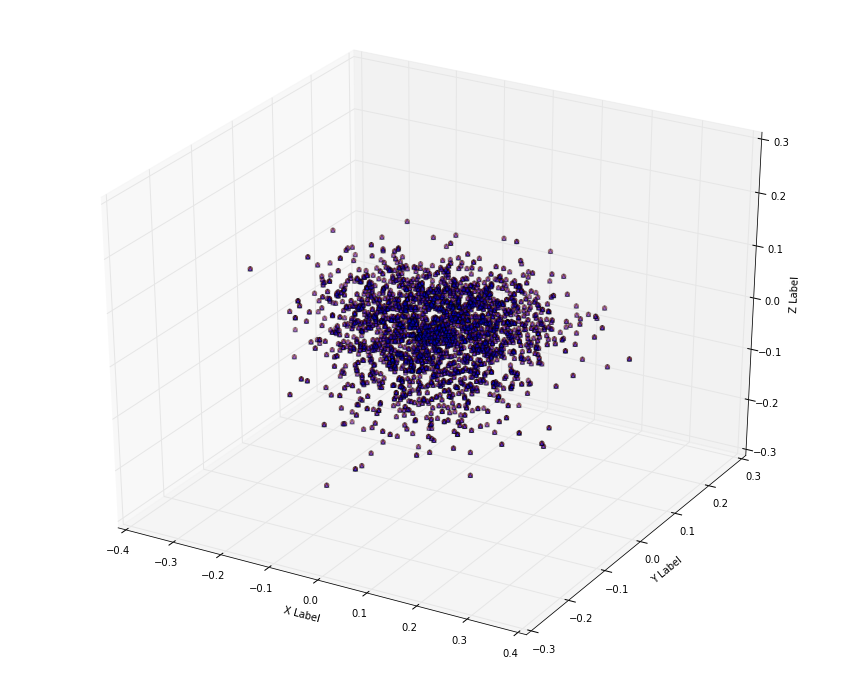

In [24]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 12.0)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = len(data3D[:,0])
for c, m in [('r', 'o'), ('b', '^')]:
    xs = data3D[:,0]
    ys = data3D[:,1]
    zs = data3D[:,2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

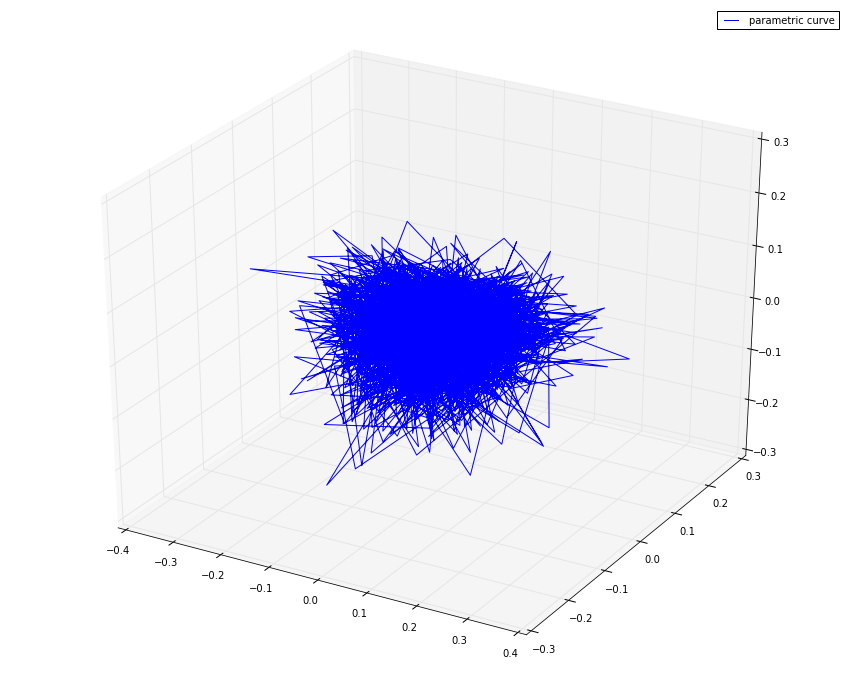

In [26]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = data3D[:,2]
r = z**2 + 1
x = data3D[:,0] 
y = data3D[:,1]
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

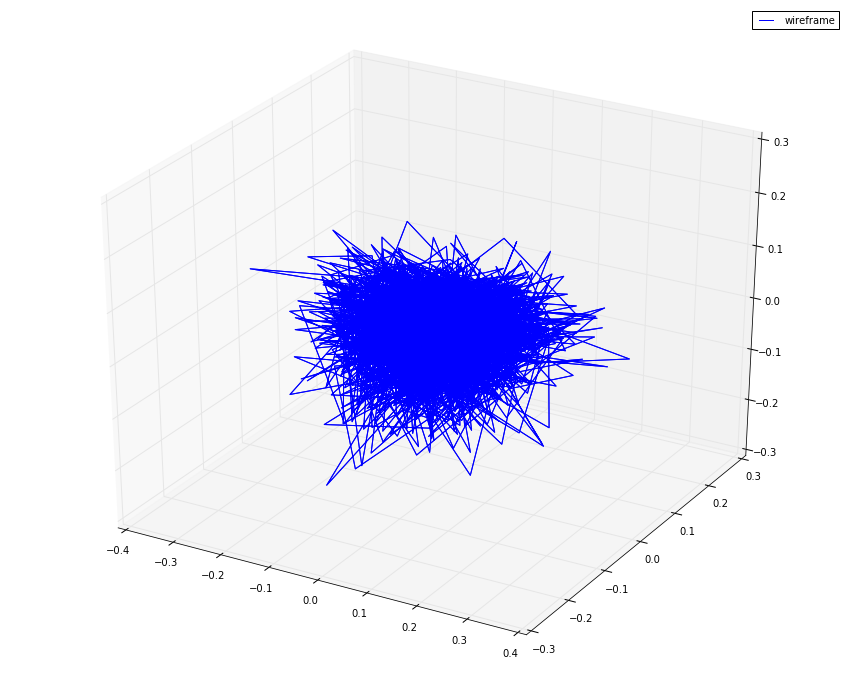

In [31]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = data3D[:,0]
Y = data3D[:,1]
Z = data3D[:,2]

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.plot(x, y, z, label='wireframe')
ax.legend()

plt.show()

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 3".